# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [2]:
# Libraries
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np
import pandas as pd

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [30]:
# your code here
employees = pd.read_csv('../data/Employee.csv')

In [4]:
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [6]:
# Method 1
# your code here
employees.groupby(['Department'])[['Salary']].mean()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [10]:
# Method 2
# your code here
employees.pivot_table(index='Department', values='Salary')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [13]:
# your code here
employees.pivot_table(index=['Department','Title'], values='Salary')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [14]:
# your code here
employees.pivot_table(index='Title', columns='Years', values='Salary')

Years,1,2,3,4,7,8
Title,,,,,,
VP,NaN,NaN,NaN,NaN,NaN,70.0
analyst,35.0,30.0,NaN,35.0,NaN,NaN
associate,NaN,55.0,55.0,NaN,60.0,NaN


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [61]:
# your code here
employees.pivot_table(index=['Title', 'Department'], values=['Salary'],
                      aggfunc={'Salary': np.mean, 'Department': 'count'})

Department  Salary
Title     Department                    
VP        HR                   1    70.0
          IT                   1    70.0
analyst   HR                   2    32.5
          IT                   2    32.5
associate IT                   1    60.0
          Sales                2    55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [62]:
# your code here
employees.pivot_table(index=['Title', 'Department'], values=['Salary'],
                      aggfunc={'Salary': [min, max, np.mean, 'std']})

Salary                      
                        max  mean   min       std
Title     Department                             
VP        HR           70.0  70.0  70.0       NaN
          IT           70.0  70.0  70.0       NaN
analyst   HR           35.0  32.5  30.0  3.535534
          IT           35.0  32.5  30.0  3.535534
associate IT           60.0  60.0  60.0       NaN
          Sales        55.0  55.0  55.0  0.000000

In [64]:
"""
Ao analisar, podemos ver que alguns cargos 
não possuem desvio padrão por ter apenas 
um registro.
"""

'\nAo analisar, podemos ver que alguns cargos \nnão possuem desvio padrão por ter apenas \num registro.\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [65]:
# your code here
employees.pivot_table(index=['Title', 'Department'], values=['Salary'],
                      aggfunc={'Salary': [min, max, np.mean, 'std']},
                      fill_value='0')

Salary                     
                        max  mean   min      std
Title     Department                            
VP        HR           70.0  70.0  70.0        0
          IT           70.0  70.0  70.0        0
analyst   HR           35.0  32.5  30.0  3.53553
          IT           35.0  32.5  30.0  3.53553
associate IT           60.0  60.0  60.0        0
          Sales        55.0  55.0  55.0        0

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [68]:
# your code here
employees.pivot_table(index=['Department'], values=['Salary'],
                      aggfunc={'Salary': sum},
                      fill_value='0')

,Salary
Department,
HR,135
IT,195
Sales,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [69]:
# your code here
employees.pivot_table(index=['Title', 'Department'], values=['Salary', 'Years'],
                      aggfunc={'Salary': np.mean , 'Years':sum},
                      fill_value='0')

Salary  Years
Title     Department               
VP        HR            70.0      8
          IT            70.0      8
analyst   HR            32.5      6
          IT            32.5      3
associate IT            60.0      7
          Sales         55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [70]:
# your code here
fitbit = pd.read_csv('../data/Fitbit.csv')

In [72]:
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [71]:
# your code here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [73]:
# your code here
"""
Sim, pois quanto mais tempo de atividades
intensas, maior vai ser o número de passos
que a pessoa irá dar.
"""

'\nSim, pois quanto mais tempo de atividades\nintensas, maior vai ser o número de passos\nque a pessoa irá dar.\n'

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [74]:
import matplotlib.pyplot as plt;

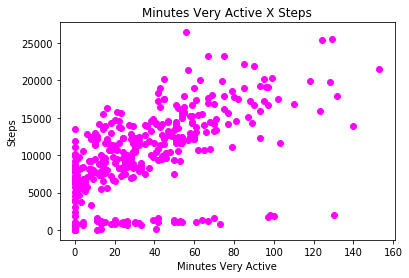

In [85]:

plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'], color='magenta')
plt.title('Minutes Very Active X Steps')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [86]:
"""
Podemos ver que mesmo com 0 minutos de muitas
atividades, muitas pessoas deram mais passos 
do que pessoas com maior tempo de atividades.
"""

'\nPodemos ver que mesmo com 0 minutos de muitas\natividades, muitas pessoas deram mais passos \ndo que pessoas com maior tempo de atividades.\n'

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

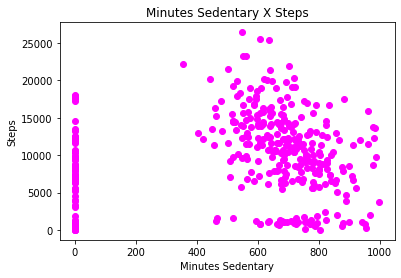

In [87]:
# your code here
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'], color='magenta')
plt.title('Minutes Sedentary X Steps')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

In [98]:
# your code here
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'], color='magenta', method=lm)
plt.title('Minutes Sedentary X Steps')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

NameError: name 'lm' is not defined

In [ ]:
"""
your commments here
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [ ]:
# your code here

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [ ]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [ ]:
# your code here

#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [ ]:
# your code here

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [ ]:
# your code here

#### Show visually the frequency distribution of the `time_grades` dataset.

In [ ]:
# your code here

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
your commments here
"""